In [37]:
from gensim.models import Word2Vec
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [6]:
songs = pd.read_csv('songs_final422.csv')

In [8]:
y = songs['Genre']

In [ ]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [ ]:
print("Classes:", le.classes_)

Classes: ['Country' 'EDM' 'Pop' 'R&B' 'Rap' 'Rock']


In [ ]:
X = songs['Stemmed No Stop Words']

In [23]:
word2vec_model = Word2Vec(X, vector_size=100, window=5, min_count=1, workers=4)
wvX = word2vec_model.wv

In [29]:
svc3_report = classification_report(y_test, svc3_predictions, target_names=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
print(svc3_report)

              precision    recall  f1-score   support

     Country       0.07      0.71      0.13        85
         EDM       0.48      0.06      0.11       233
         Pop       0.52      0.05      0.08       742
         R&B       0.12      0.12      0.12       169
         Rap       0.63      0.71      0.66       412
        Rock       0.35      0.41      0.38       435

    accuracy                           0.29      2076
   macro avg       0.36      0.34      0.25      2076
weighted avg       0.45      0.29      0.27      2076



In [ ]:
def document_vector(song, wvX):
    #get song embedding by taking average of word embeddings
    vectors = [wvX[word] for word in song if word in wvX]
    return np.sum(vectors, axis=0) if vectors else np.zeros(wvX.vector_size)

# Generate document-level embeddings for each sample in `X`
X_word2vec = np.array([document_vector(song, wvX) for song in X])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y_le, test_size=0.2, random_state=51)

In [24]:
#third model has balanced class weights (class_weight = 'balanced') with word2vec embeddings
svcmodel3 = SVC(class_weight = 'balanced')

In [34]:
svcmodel3.fit(X_train, y_train)

SVC(class_weight='balanced')

In [27]:
svc3_predictions = svcmodel3.predict(X_test)

In [30]:
svc3_report = classification_report(y_test, svc3_predictions, target_names=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
print(svc3_report)

              precision    recall  f1-score   support

     Country       0.07      0.71      0.13        85
         EDM       0.48      0.06      0.11       233
         Pop       0.52      0.05      0.08       742
         R&B       0.12      0.12      0.12       169
         Rap       0.63      0.71      0.66       412
        Rock       0.35      0.41      0.38       435

    accuracy                           0.29      2076
   macro avg       0.36      0.34      0.25      2076
weighted avg       0.45      0.29      0.27      2076



In [ ]:
### LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

lda_report = classification_report(y_test, lda_pred, target_names=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
print(lda_report)

              precision    recall  f1-score   support

           0       0.25      0.01      0.02        85
           1       0.33      0.01      0.02       233
           2       0.43      0.81      0.56       742
           3       0.20      0.01      0.02       169
           4       0.73      0.63      0.68       412
           5       0.41      0.27      0.33       435

    accuracy                           0.47      2076
   macro avg       0.39      0.29      0.27      2076
weighted avg       0.45      0.47      0.41      2076



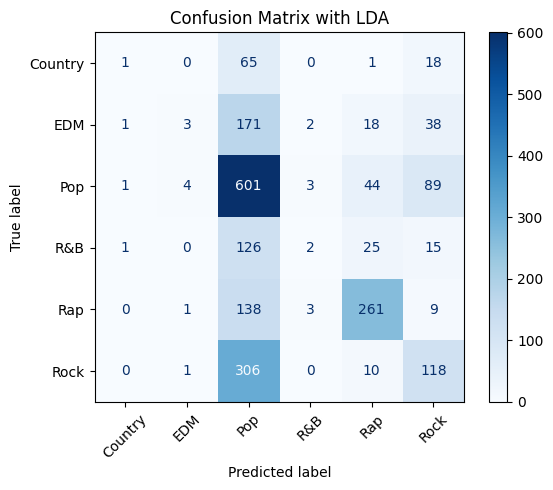

In [38]:
### LDA Confusion Matrix
lda_cm = confusion_matrix(y_test, lda_pred)

lda_cm_plot = ConfusionMatrixDisplay(confusion_matrix=lda_cm, display_labels=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
lda_cm_plot.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix with LDA")
plt.show()